In [47]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

import cv2
import numpy as np
import math
from scipy import stats


%pylab inline

Populating the interactive namespace from numpy and matplotlib


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

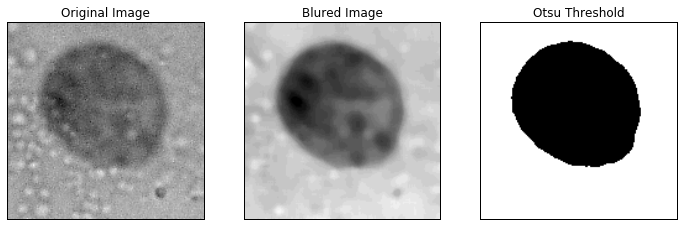

In [48]:
pylab.rcParams['figure.figsize'] = (12, 8)

img_noblur = cv2.imread('Tests/1_1.bmp',0)
img_blured = cv2.medianBlur(img_noblur,11)
r, mask = cv2.threshold(img_blured,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.subplot(2,3,1),plt.imshow(img_noblur,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])

plt.subplot(2,3,2),plt.imshow(img_blured,'gray')
plt.title('Blured Image')
plt.xticks([]),plt.yticks([])

plt.subplot(2,3,3),plt.imshow(mask,'gray')
plt.title('Otsu Threshold')
plt.xticks([]),plt.yticks([])

In [49]:
def apply_mask(img, mask, background_value=0):
    n, m = mask.shape
    assert (n, m) == img.shape
    for i in range(n):
        for j in range(m):
            if mask[i][j] == background_value:
                img[i][j] = 0

In [50]:
img = np.array(img_noblur)
apply_mask(img, mask, 255)

136.0


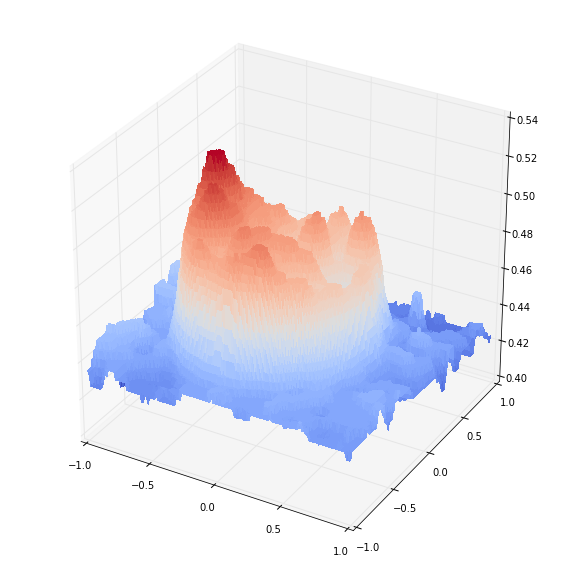

In [99]:
pylab.rcParams['figure.figsize'] = (10, 10)

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

n, m = img.shape

#X = [[j for j in range(m)] for i in range(n)]
#Y = [[j for j in range(m)] for i in range(n)]

Y = np.arange(-1.0, 1.0, 2.0/n)
X = np.arange(-1.0, 1.0, 2.0/m)
X, Y = np.meshgrid(X, Y)

print(r)

Z = 1.0 - img_blured/255.0


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot x,y plane.

surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, zorder=1)

In [100]:
def generate_eps(img, step=1):
    n, m = img.shape
    k = min(30, min(n, m)//4)
    
    return ((step*x + step) for x in range(k//step))
    
def box_count3d(img, sqrt_eps, background_value=0):
    N, M = img.shape    
    n = N // sqrt_eps
    m = M // sqrt_eps  
    
    count = 0
    contains = False
    for i in range(n+1):
        for j in range(m+1):
            boxes = dict([])
            maxim = 0
            for a in range(sqrt_eps):                
                for b in range(sqrt_eps):                    
                    if (i*sqrt_eps+a < N) and (j*sqrt_eps+b < M):
                        x = img[i*sqrt_eps+a][j*sqrt_eps+b]
                        if x == background_value:
                            continue
                        #boxes[x//sqrt_eps] = 1
                        if x > maxim:
                            maxim = x
            
            #if (sqrt_eps == 3):
            #    print('len:', len(boxes), '; boxes:', boxes)
            count += maxim // sqrt_eps
            if maxim % sqrt_eps > 0:
                count += 1
            count += len(boxes)
            
    return count

[13.867198424497996, 11.840046976652998, 10.665460924025925, 9.840068404666473, 9.194007717355285, 8.690978417187905, 8.255048902752295, 7.874358824729881, 7.560601162768557, 7.253470382684528, 6.996681488176539, 6.74993119378857, 6.529418838262226, 6.401917196727186, 6.20455776256869, 6.008813185442595, 5.87493073085203, 5.66988092298052, 5.605802066295998, 5.459585514144159, 5.3471075307174685, 5.241747015059643, 5.147494476813453, 4.941642422609304, 4.882801922586371, 4.787491742782046, 4.736198448394496, 4.727387818712341, 4.553876891600541, 4.442651256490317]


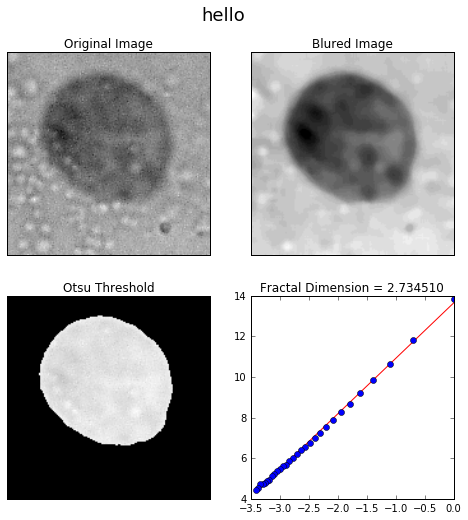

In [102]:
pylab.rcParams['figure.figsize'] = (8, 8)

x = []
y = []
gen = generate_eps(img)
for eps in gen:    
    count = box_count3d(img, eps, 0)
    #eps = eps / max(img.shape)
    x += [-1.0 * math.log(eps)]    
    y += [math.log(count)]

print(y)
slope, intercept = np.polyfit(x, y, 1)
line = [slope*a+intercept for a in x]  # regression line

plt.suptitle("hello", size=18)

plt.subplot(2,2,1),plt.imshow(img_noblur,'gray')
plt.title('Original Image')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,2),plt.imshow(img_blured,'gray')
plt.title('Blured Image')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,3),plt.imshow(img,'gray')
plt.title('Otsu Threshold')
plt.xticks([]),plt.yticks([])

plt.subplot(2,2,4),plot(x,line,'r-',x,y,'o')
plt.title('Fractal Dimension = %f' % slope)

